<center>
<a href="https://exed.polytechnique.edu/fr" ><img src="https://exed.polytechnique.edu/sites/all/themes/college/images/logo.png" style="float:left; max-width: 360px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# [Scénarios d'Apprentissage Statistique] 

# GRC: Score d'appétence d'un produit bancaire  en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

#### Résumé
Les données sont composées de 825 clients d'une banque décrits par 32 variables concernant leurs avoirs, et utilisations de leurs comptes. Le premier objectif est une exploration du jeu de données, une segmentation ou profilage des types de comportement des clients, le 2ème consiste à estimer puis prévoir un *score d'appétence* pour un produit bancaie, ici la carte visa premier. Comparaison des différentes méthodes et algorihtmes d'apprentissage pour atteindre cet objectif de la régression logistique au *boosting* (*extrem gradient*) en passant par les arbres, les SVM ou random forest. Une procédure de validation croisée généralisée est itérée sur une selection de ces méthodes. Celles d'agrégation de modèles conduisent aux meilleurs résultats. 

## Introduction


### Présentation des données
#### Les variables
La liste des variables est issue d'une base de données retraçant l'historique mensuel bancaire et les caractéristiques de tous les clients. Un sondage a été réalisé afin d'alléger les traitements ainsi qu'une première sélection de variables. Les variables contenues dans le fichier initial sont décrites dans le tableau ci-dessous. Elles sont observées sur 1425 clients.

*Tableau: Liste des variables initiales et de leur libellé* Attention, certains sont écrits en majuscules dans les programmes puis en minuscules après transfomation des données (logarithme, recodage) au cours d ela phase d'exploration. Les noms des variables logarithmes des variables quantitatives se terminent par `L`les variables qualitatives se terminent par `Q`ou `q`. 

**Identifiant** | **Libellé**
           --|--
`sexeq` | Sexe (qualitatif) 
`ager` | Age en années
`famiq` | Situation familiale: `Fmar Fcel Fdiv Fuli Fsep Fveu`
`relat` | Ancienneté de relation en mois
`pcspq` | Catégorie socio-professionnelle (code num)
`opgnb` | Nombre d'opérations par guichet dans le mois
`moyrv` | Moyenne des mouvements nets créditeurs des 3 mois en Kf
`tavep` | Total des avoirs épargne monétaire en francs
`endet` | Taux d'endettement
`gaget` | Total des engagements en francs
`gagec` | Total des engagements court terme en francs
`gagem` | Total des engagements moyen terme en francs
`kvunb` | Nombre de comptes à vue
`qsmoy` | Moyenne des soldes moyens sur 3 mois
`qcred` | Moyenne des mouvements créditeurs en Kf
`dmvtp` | Age du dernier mouvement (en jours)\hline
`boppn` | Nombre d'opérations à M-1
`facan` | Montant facturé dans l'année en francs
`lgagt` | Engagement long terme
`vienb` | Nombre de produits contrats vie
`viemt` | Montant des produits contrats vie en francs
`uemnb` | Nombre de produits épargne monétaire
`xlgnb` | Nombre de produits d'épargne logement
`xlgmt` | Montant des produits d'épargne logement en francs
`ylvnb` | Nombre de comptes sur livret
`ylvmt` | Montant des comptes sur livret en francs
`rocnb` | Nombre de paiements par carte bancaire à M-1
`nptag` | Nombre de cartes point argent
`itavc` | Total des avoirs sur tous les comptes
`havef` | Total des avoirs épargne financière en francs
`jnbjd | Nombre de jours à débit à M
**`carvp`** | **Possession de la carte VISA Premier**

#### Remarque importante: 


<center>
<img src="http://www.cmap.polytechnique.fr/~aymeric.dieuleveut/papers/This-is-ML-pipe" style="float:left; max-width: 600px; display: inline" alt="INSA"/></center>
<br>


Voir par exemple: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7


# 1. Importation des données

In [260]:
import pandas as pd
vispremv = pd.read_table("vispremv.dat",sep=" ")

In [261]:
vispremv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 148009 to 7589439
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEXEQ   1063 non-null   object 
 1   FAMIQ   1063 non-null   object 
 2   PCSPQ   1063 non-null   object 
 3   kvunbq  1063 non-null   object 
 4   vienbq  1063 non-null   object 
 5   uemnbq  1063 non-null   object 
 6   xlgnbq  1063 non-null   object 
 7   ylvnbq  1063 non-null   object 
 8   rocnbq  1063 non-null   object 
 9   nptagq  1063 non-null   object 
 10  endetq  1063 non-null   object 
 11  gagetq  1063 non-null   object 
 12  facanq  1063 non-null   object 
 13  lgagtq  1063 non-null   object 
 14  havefq  1063 non-null   object 
 15  jnbjdq  1063 non-null   object 
 16  ageq    1063 non-null   object 
 17  relatq  1063 non-null   object 
 18  qsmoyq  1063 non-null   object 
 19  opgnbq  1063 non-null   object 
 20  moyrvq  1063 non-null   object 
 21  tavepq  1063 non-null   objec

In [262]:
vispremv.head()

SEXEQ FAMIQ PCSPQ kvunbq vienbq uemnbq xlgnbq ylvnbq rocnbq nptagq  \
148009  Shom  Fcou  Pint     K1     V1     U2     X2     Y2     R1     N0   
552427  Shom  Fcou  Pint     K0     V0     U1     X0     Y1     R0     N0   
556005  Shom  Fseu  Psan     K0     V0     U2     X1     Y2     R1     N0   
556686  Shom  Fseu  Pouv     K0     V1     U2     X2     Y2     R1     N1   
642680  Shom  Fcou  Pint     K0     V0     U2     X1     Y2     R1     N0   

        ... XLGNB     XLGMTL YLVNB     YLVMTL ROCNB NPTAG     ITAVCL  \
148009  ...     2  13.161865     2  12.110635    14     0  14.080718   
552427  ...     0   0.000000     1   8.132413     0     0  11.717872   
556005  ...     1  10.743178     2  10.309286    14     0  11.329303   
556686  ...     3  12.899220     2  11.203025    11     1  13.111856   
642680  ...     1  10.457976     2   9.190546    27     0  11.304904   

           HAVEFL    JNBJDL CARVP  
148009  13.230263  0.693147  Coui  
552427   0.000000  0.000000  Coui  
556005   0.000000  0.000000  Coui  
556686   9.972267  2.772589  Coui  
642680   0.000000  1.386294  Coui  

[5 rows x 54 columns]

# 2. Distribution de la variable cible

(array([357.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 706.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

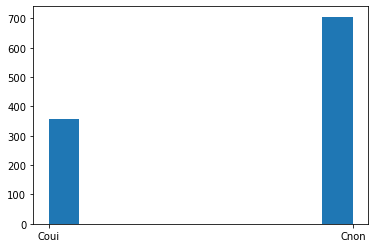

In [263]:
import matplotlib.pyplot as plt
plt.hist(vispremv.CARVP)

3. Traitement de la données

In [264]:
# Transformation en indicatrices
vispremDum = pd.get_dummies(vispremv[["SEXEQ", "FAMIQ", "PCSPQ"]])
# Une seule est conservée pour les variables binaires
vispremDum.drop(["SEXEQ_Sfem", "FAMIQ_Fseu"], axis=1, inplace=True)
# Sélection des variables numériques
vispremNum = vispremv.select_dtypes(exclude=['object'])
# Concaténation des variables retenues
vispremR = pd.concat([vispremDum, vispremNum], axis=1)
print(vispremR.columns)
#send(‘Dummy variable done’, 2)

Index(['SEXEQ_Shom', 'FAMIQ_Fcou', 'PCSPQ_Pcad', 'PCSPQ_Pemp', 'PCSPQ_Pint',
       'PCSPQ_Pouv', 'PCSPQ_Psan', 'RELAT', 'AGER', 'OPGNBL', 'MOYRVL',
       'TAVEPL', 'ENDETL', 'GAGETL', 'GAGECL', 'GAGEML', 'KVUNB', 'QSMOY',
       'QCREDL', 'DMVTPL', 'BOPPNL', 'FACANL', 'LGAGTL', 'VIENB', 'VIEMTL',
       'UEMNB', 'XLGNB', 'XLGMTL', 'YLVNB', 'YLVMTL', 'ROCNB', 'NPTAG',
       'ITAVCL', 'HAVEFL', 'JNBJDL'],
      dtype='object')


In [265]:
vispremR.head()

SEXEQ_Shom  FAMIQ_Fcou  PCSPQ_Pcad  PCSPQ_Pemp  PCSPQ_Pint  \
148009           1           1           0           0           1   
552427           1           1           0           0           1   
556005           1           0           0           0           0   
556686           1           0           0           0           0   
642680           1           1           0           0           1   

        PCSPQ_Pouv  PCSPQ_Psan  RELAT  AGER    OPGNBL  ...  UEMNB  XLGNB  \
148009           0           0    238    51  0.000000  ...      4      2   
552427           0           0    139    58  0.000000  ...      1      0   
556005           0           1     99    27  0.000000  ...      3      1   
556686           1           0     89    49  0.000000  ...      5      3   
642680           0           0    216    64  1.791759  ...      4      1   

           XLGMTL  YLVNB     YLVMTL  ROCNB  NPTAG     ITAVCL     HAVEFL  \
148009  13.161865      2  12.110635     14      0  14.080718  13.230263   
552427   0.000000      1   8.132413      0      0  11.717872   0.000000   
556005  10.743178      2  10.309286     14      0  11.329303   0.000000   
556686  12.899220      2  11.203025     11      1  13.111856   9.972267   
642680  10.457976      2   9.190546     27      0  11.304904   0.000000   

          JNBJDL  
148009  0.693147  
552427  0.000000  
556005  0.000000  
556686  2.772589  
642680  1.386294  

[5 rows x 35 columns]

# 3. Utilisation PCA

## 3.1 Uniformisation des données

In [266]:
from sklearn.preprocessing import StandardScaler
# Transformation en indicatrices
vispremDum = pd.get_dummies(vispremv[['SEXEQ', 'FAMIQ', 'PCSPQ']])
# Une seule est conservée pour les variables binaires
vispremDum.drop(['SEXEQ_Sfem', 'FAMIQ_Fseu'], axis=1, inplace=True)
# Sélection des variables numériques
vispremNum = vispremv.select_dtypes(exclude=['object'])
# Concaténation des variables retenues
vispremR = pd.concat([vispremDum, vispremNum], axis=1)
y=vispremv['CARVP'].map(lambda x: 0 if x=='Cnon' else 1)
scaler = StandardScaler()
scaler.fit(vispremR)
X_train_scaled = scaler.transform(vispremR)


## 3.2 Effet de la Uniformisation des données

Text(0, 0.5, 'Features magnitude')

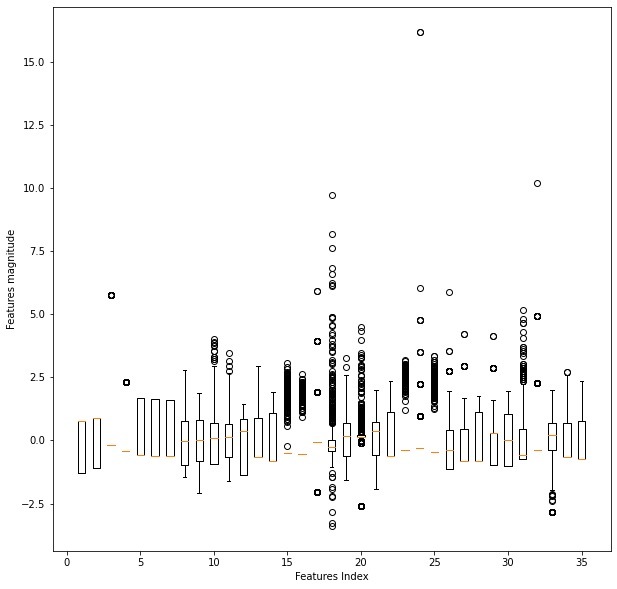

In [285]:
plt.figure(figsize=(10, 10))
plt.boxplot(X_train_scaled, manage_ticks=False)
#plt.yscale("symlog")
plt.xlabel("Features Index")
plt.ylabel("Features magnitude")

### 3.3.3 Execution de la PCA

In [269]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_scaled)

vispremR_pca  = pca.transform(X_train_scaled)
pca.components_

array([[ 0.0816875 ,  0.06857142,  0.04492522,  0.06727952,  0.05854341,
        -0.0122728 , -0.1160652 ,  0.13219898,  0.10944154,  0.16302025,
         0.2914209 ,  0.23958936,  0.17209355,  0.20758601,  0.10147271,
         0.15900044,  0.18261344,  0.09814386,  0.28685701,  0.07752449,
         0.26502169,  0.09617518,  0.15205473,  0.13529063,  0.16629356,
         0.26263715,  0.20194209,  0.20850008,  0.20057532,  0.20823739,
         0.18830318, -0.02638468,  0.24050046,  0.19967899,  0.08862719],
       [ 0.12412838,  0.04345992,  0.03769055, -0.01737411,  0.0774179 ,
         0.01784344, -0.09305405, -0.08194258, -0.05989163,  0.12143038,
         0.13469044, -0.27952741,  0.22638721,  0.28344307,  0.23445739,
         0.21267432,  0.21266411, -0.02691213,  0.14910779,  0.15979135,
         0.17875631,  0.06652206,  0.11932696, -0.17060334, -0.21053677,
        -0.24058983, -0.18521538, -0.22768317, -0.17374576, -0.20832989,
         0.14141852,  0.05898404, -0.20648214, -0.

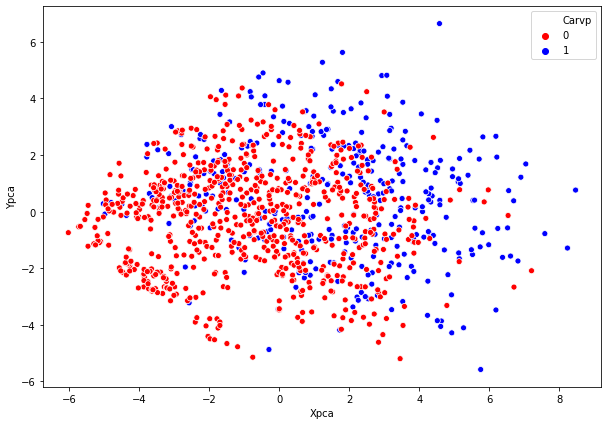

In [270]:
# keep only two components for visu
import seaborn as sns
pca = PCA(n_components=2)
pca_obj = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame({'Xpca':pca_obj[:,0],
                        'Ypca':pca_obj[:,1],
                        'Carvp':y})
plt.figure(figsize=(10, 7))

sns.scatterplot(x='Xpca', y='Ypca',
              hue='Carvp',
              palette=['red','blue'],
              legend='full',
              data=pca_df);
plt.show()

In [296]:
pca.components_

array([[ 0.08168749,  0.06857142,  0.04492519,  0.06727953,  0.05854342,
        -0.01227281, -0.1160652 ,  0.13219898,  0.10944154,  0.16302027,
         0.2914209 ,  0.23958936,  0.17209355,  0.20758601,  0.1014727 ,
         0.15900043,  0.18261344,  0.09814386,  0.28685702,  0.07752448,
         0.2650217 ,  0.09617516,  0.15205474,  0.13529064,  0.16629357,
         0.26263715,  0.20194209,  0.20850008,  0.20057532,  0.20823739,
         0.18830318, -0.02638467,  0.24050045,  0.19967899,  0.08862719],
       [ 0.12412131,  0.04346531,  0.0376757 , -0.01738339,  0.07741947,
         0.01784224, -0.09304134, -0.08193608, -0.05988463,  0.12143816,
         0.13469206, -0.27952657,  0.22638964,  0.2834439 ,  0.23445709,
         0.21267739,  0.21266269, -0.02691395,  0.14911093,  0.15978532,
         0.17876004,  0.06651169,  0.11932468, -0.17060361, -0.21053867,
        -0.24059077, -0.18521606, -0.22768294, -0.17374773, -0.20833127,
         0.14141703,  0.05898626, -0.20648047, -0.

Text(0, 0.5, 'Principal Comonents')

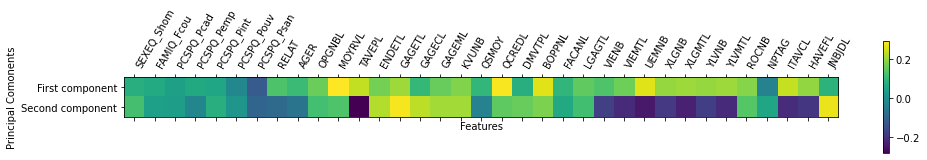

In [272]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(X_train_scaled.shape[1]),vispremR.columns, rotation=60, ha='left')
plt.xlabel('Features')
plt.ylabel('Principal Comonents')

# 4. Séparation du jeu de données

In [273]:
from sklearn.model_selection import train_test_split
rd_seed = 111 # Modifier cette valeur d’initial
npop = len(vispremv)
xApp, xTest, yApp, yTest = train_test_split(vispremR, y, test_size=200, random_state=rd_seed)

# 5. Régression Logistique

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Grille de valeurs du paramètre de pénalisaiton
param=[{'C':[0.5, 1, 5, 10, 12, 15, 30]}]
lr = LogisticRegression(penalty='l2',solver='liblinear', C=10.5)
logitL = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param, cv=5, n_jobs=-1)
logitLasso=logitL.fit(xApp, yApp)
print("Training score: {:.3f}".format(logitLasso.score(xApp, yApp)))
y_predict=logitLasso.predict(xTest)lr = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param, cv=5, n_jobs=-1)

print("Test score: {:.3f}".format(np.sum(yTest==y_predict)/200))

Training score: 0.853
Test score: 0.840


In [275]:
pd.crosstab(y_predict, yTest)

CARVP    0   1
row_0         
0      118  18
1       14  50

## 5.1 Choix de la meilleure valeur de régularisation

In [276]:
logitLasso.best_params_

{'C': 10}

In [277]:
import numpy as np
LassoOpt=LogisticRegression(penalty='l2',solver='liblinear',C=5)
LassoOpt=LassoOpt.fit(xApp, yApp)
# Récupération des coefficients
vect_coef=np.matrix.transpose(LassoOpt.coef_)
vect_coef=vect_coef.ravel()
#Affichage des 25 plus importants
coef=pd.Series(abs(vect_coef),index=xApp.columns).sort_values(ascending=False)
print(coef)

PCSPQ_Pcad    2.364584
PCSPQ_Psan    2.017754
XLGNB         1.419669
SEXEQ_Shom    1.409445
PCSPQ_Pouv    1.331289
KVUNB         1.237994
UEMNB         1.218862
BOPPNL        1.118226
NPTAG         1.005930
OPGNBL        0.720521
YLVNB         0.655803
PCSPQ_Pint    0.606283
QCREDL        0.592037
PCSPQ_Pemp    0.566606
ENDETL        0.469068
MOYRVL        0.389149
VIENB         0.199063
DMVTPL        0.149070
XLGMTL        0.108949
YLVMTL        0.089471
GAGECL        0.087503
FAMIQ_Fcou    0.081113
JNBJDL        0.079282
FACANL        0.076486
HAVEFL        0.071686
ITAVCL        0.071666
TAVEPL        0.056688
GAGETL        0.045320
GAGEML        0.040297
ROCNB         0.039839
LGAGTL        0.022345
VIEMTL        0.015014
RELAT         0.006691
AGER          0.004435
QSMOY         0.000007
dtype: float64


# 6. Arbre de decision

## 6.1 Score obtenu

In [278]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_=tree.fit(xApp, yApp)
print("Training score: {:.3f}".format(tree_.score(xApp, yApp)))
y_predict=tree_.predict(xTest)
print("Test score: {:.3f}".format(np.sum(yTest==y_predict)/200))

Training score: 0.896
Test score: 0.845


In [279]:
pd.crosstab(y_predict, yTest)

CARVP    0   1
row_0         
0      121  20
1       11  48

## 6.2 Importance de features

([<matplotlib.axis.YTick at 0x1d86610cb80>,
 [Text(0, 0, 'SEXEQ_Shom'),
  Text(0, 0, 'FAMIQ_Fcou'),
  Text(0, 0, 'PCSPQ_Pcad'),
  Text(0, 0, 'PCSPQ_Pemp'),
  Text(0, 0, 'PCSPQ_Pint'),
  Text(0, 0, 'PCSPQ_Pouv'),
  Text(0, 0, 'PCSPQ_Psan'),
  Text(0, 0, 'RELAT'),
  Text(0, 0, 'AGER'),
  Text(0, 0, 'OPGNBL'),
  Text(0, 0, 'MOYRVL'),
  Text(0, 0, 'TAVEPL'),
  Text(0, 0, 'ENDETL'),
  Text(0, 0, 'GAGETL'),
  Text(0, 0, 'GAGECL'),
  Text(0, 0, 'GAGEML'),
  Text(0, 0, 'KVUNB'),
  Text(0, 0, 'QSMOY'),
  Text(0, 0, 'QCREDL'),
  Text(0, 0, 'DMVTPL'),
  Text(0, 0, 'BOPPNL'),
  Text(0, 0, 'FACANL'),
  Text(0, 0, 'LGAGTL'),
  Text(0, 0, 'VIENB'),
  Text(0, 0, 'VIEMTL'),
  Text(0, 0, 'UEMNB'),
  Text(0, 0, 'XLGNB'),
  Text(0, 0, 'XLGMTL'),
  Text(0, 0, 'YLVNB'),
  Text(0, 0, 'YLVMTL'),
  Text(0, 0, 'ROCNB'),
  Text(0, 0, 'NPTAG'),
  Text(0, 0, 'ITAVCL'),
  Text(0, 0, 'HAVEFL'),
  Text(0, 0, 'JNBJDL')])

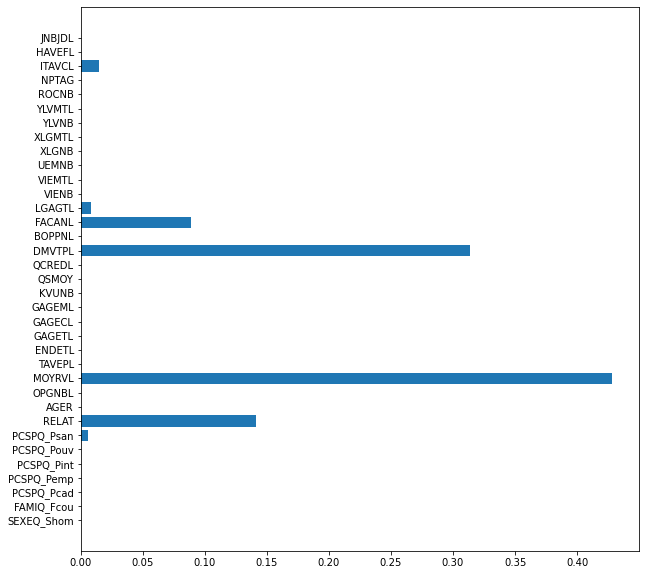

In [280]:
plt.figure(figsize=(10,10))
plt.barh(range(xApp.shape[1]),tree_.feature_importances_,align='center')
plt.yticks(range(xApp.shape[1]), xApp.columns)


# 7. Random Forest

In [281]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=5, random_state=2)
random_=random.fit(xApp, yApp)
print("Training score: {:.3f}".format(random_.score(xApp, yApp)))
y_predict=random_.predict(xTest)
print("Test score: {:.3f}".format(np.sum(yTest==y_predict)/200))

Training score: 0.987
Test score: 0.845


In [282]:
pd.crosstab(y_predict, yTest)

CARVP    0   1
row_0         
0      118  17
1       14  51

# 8 Gradient Boosting

In [318]:
from sklearn.ensemble import GradientBoostingClassifier
grbt = GradientBoostingClassifier(random_state=0)
grbt_ = grbt.fit(xApp, yApp)
print("Training score: {:.3f}".format(grbt_.score(xApp, yApp)))
y_predict=grbt_.predict(xTest)
print("Test score: {:.3f}".format(np.sum(yTest==y_predict)/200))

Training score: 0.990
Test score: 0.890


In [319]:
pd.crosstab(y_predict, yTest)

CARVP    0   1
row_0         
0      125  15
1        7  53

In [305]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
param_grid_rs={
        'gradientboostingclassifier__n_estimators':randint(10, 200),
        'gradientboostingclassifier__learning_rate':[0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.3, 1.4, 1.5],
        'gradientboostingclassifier__max_depth':randint(50, 150),
}
rando_search = RandomizedSearchCV(
    estimator=pipeline,
    n_iter=100,
    param_distributions=param_grid_rs,
    scoring='balanced_accuracy',
)
rando_search.fit(X,y)
df_results = pd.DataFrame(rando_search.cv_results_)
df_results.sort_values(by='mean_test_score', ascending=False).head()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.973


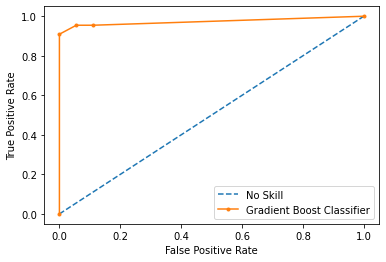

In [306]:
gbc = GradientBoostingClassifier(
    n_estimators=30,
    learning_rate=0.8,
    max_depth=133,
    )
gbc.fit(X_train, y_train)

confusion_matrix(y_test, gbc.predict(X_test))
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = gbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Gradient Boost Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

(array([342., 100.,  67.,  55.,  42.,  37.,  43.,  35.,  48.,  94.]),
 array([0.00110336, 0.10099243, 0.20088151, 0.30077058, 0.40065965,
        0.50054872, 0.60043779, 0.70032687, 0.80021594, 0.90010501,
        0.99999408]),
 <a list of 10 Patch objects>)

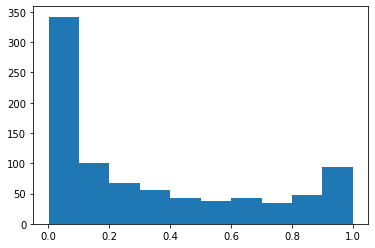

In [322]:
plt.hist(lr_probs)